In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tf.__version__

'2.14.0'

# Load Environment variables

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv

import os

import json
import logging
import sys

import ipytest

ipytest.autoconfig(raise_on_error=True)

In [3]:
import os

KAGGLE_USERNAME = os.environ.get("KAGGLE_USERNAME")
KAGGLE_KEY = os.environ.get("KAGGLE_KEY")

# Get the data

## Download data from kaggle

https://www.kaggle.com/code/gopal03/gbc-prediction-with-98-accuracy

In [5]:
!kaggle datasets download -d prishasawhney/mushroom-dataset

Dataset URL: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset
License(s): other




  0%|          | 0.00/602k [00:00<?, ?B/s]
100%|██████████| 602k/602k [00:01<00:00, 552kB/s]
100%|██████████| 602k/602k [00:01<00:00, 551kB/s]


## Unzip 

In [6]:
import zipfile
with zipfile.ZipFile('mushroom-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('mushroom-dataset')

# Data Preprocessing

In [4]:
full_dataset = pd.read_csv('mushroom-dataset/mushroom_cleaned.csv')
full_dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
full_dataset['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [6]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
full_dataset.isna().sum() [ full_dataset.isna().sum() > 0] # Nan values

Series([], dtype: int64)

In [12]:
full_dataset.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [13]:
full_dataset.shape

(54035, 9)

<Axes: >

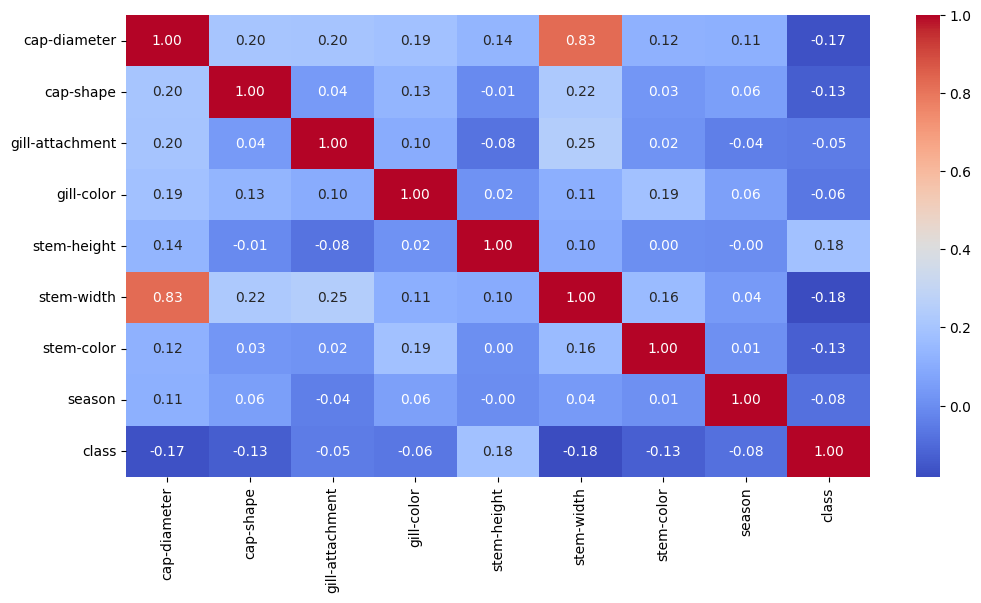

In [17]:
# correlation map

plt.figure(figsize=(12,6))
sns.heatmap(full_dataset.corr(), cmap='coolwarm', fmt='.2f', annot=True)

## Train test split

In [5]:
X = full_dataset.drop('class', axis=1)
y = full_dataset['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
X_train, X_valid,y_train,y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=2024)

In [18]:
X_train.shape, X_test.shape

((36743, 8), (10807, 8))

## Scale inputs

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
ct = ColumnTransformer([
    ('standard_scaler', scaler, 
     ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season']) # all columns 
], remainder='passthrough')

X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.fit_transform(X_test)
X_valid_scaled = ct.fit_transform(X_valid)
X_train_scaled

array([[-0.67881331, -1.84248577, -0.96263867, ..., -0.616612  ,
         0.79501637, -0.20842965],
       [-0.50416899, -0.91850815,  1.73792882, ..., -0.78105256,
         1.10147776, -0.20842965],
       [-1.16948069,  0.92944711, -0.96263867, ..., -1.12905466,
         0.79501637, -0.20842965],
       ...,
       [ 2.93050267,  0.46745829, -0.51254409, ...,  2.18270163,
        -0.73729057, -0.02876908],
       [-0.09666557, -1.38049696,  1.73792882, ...,  0.07939221,
         0.79501637, -0.20842965],
       [ 1.19514798,  0.92944711, -0.96263867, ...,  1.4624775 ,
        -0.73729057, -0.02876908]])

# Build ANN Model

## Design the model

In [20]:
classifier = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [14]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


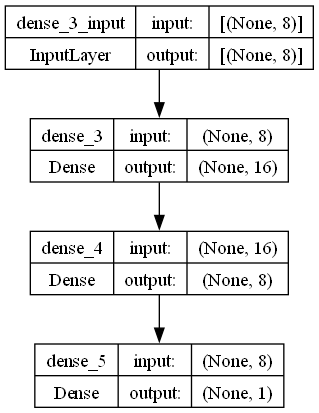

In [15]:
tf.keras.utils.plot_model(classifier, to_file='mushroom_classification.png', show_shapes=True)

## Compile the model

In [21]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the model

In [22]:
classifier.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1149/1149 [==============================] - 3s 2ms/step - loss: 0.5861 - accuracy: 0.6808 - val_loss: 0.5355 - val_accuracy: 0.7288
Epoch 2/20
1149/1149 [==============================] - 2s 1ms/step - loss: 0.5152 - accuracy: 0.7357 - val_loss: 0.4907 - val_accuracy: 0.7577
Epoch 3/20
1149/1149 [==============================] - 2s 2ms/step - loss: 0.4781 - accuracy: 0.7594 - val_loss: 0.4593 - val_accuracy: 0.7756
Epoch 4/20
1149/1149 [==============================] - 2s 2ms/step - loss: 0.4513 - accuracy: 0.7787 - val_loss: 0.4353 - val_accuracy: 0.7944
Epoch 5/20
1149/1149 [==============================] - 2s 2ms/step - loss: 0.4305 - accuracy: 0.7917 - val_loss: 0.4190 - val_accuracy: 0.8029
Epoch 6/20
1149/1149 [==============================] - 2s 2ms/step - loss: 0.4129 - accuracy: 0.8060 - val_loss: 0.4036 - val_accuracy: 0.8125
Epoch 7/20
1149/1149 [==============================] - 2s 2ms/step - loss: 0.3965 - accuracy: 0.8185 - val_loss: 0.3849 - val_accuracy:

# Evaluate Model

In [26]:
y_pred = classifier.predict(X_test_scaled)
y_pred

338/338 [==============================] - 0s 1ms/step


array([[0.78857744],
       [0.06725166],
       [0.89976937],
       ...,
       [0.86541754],
       [0.00369174],
       [0.11161979]], dtype=float32)

In [27]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
y_pred_binary

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [29]:
from sklearn.metrics import classification_report

lr_report = classification_report(y_pred = y_pred_binary, y_true=y_test)
print(lr_report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4912
           1       0.88      0.92      0.90      5895

    accuracy                           0.89     10807
   macro avg       0.89      0.89      0.89     10807
weighted avg       0.89      0.89      0.89     10807



# Plots

## ROC AUC

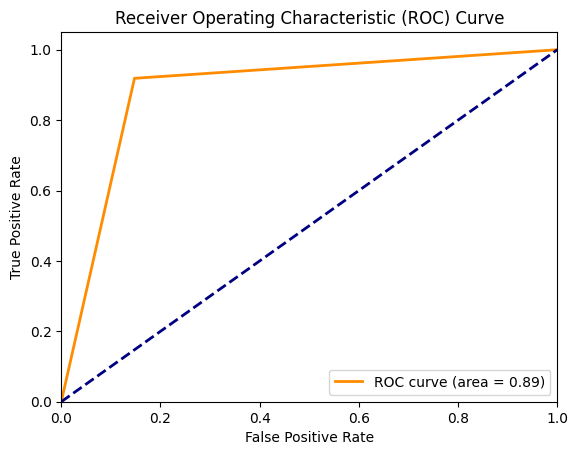

In [30]:
import sys

sys.path.append('../../../util')
from common_functions import plot_auc_roc

plot_auc_roc(y_test, y_pred_binary)

## AUPR

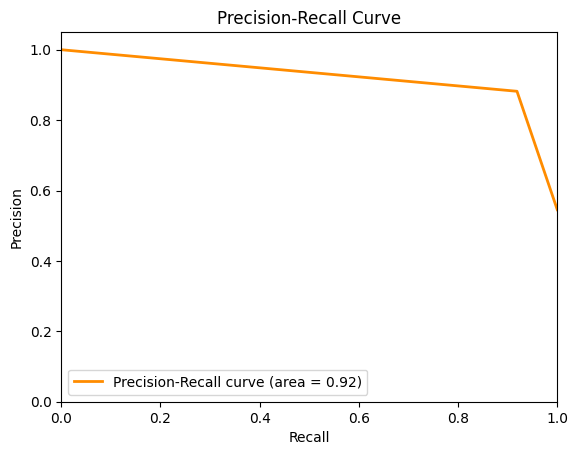

In [31]:
from common_functions import plot_aupr

plot_aupr(y_test, y_pred_binary)